<a href="https://colab.research.google.com/github/ElZho/ElZho/blob/main/Find_Froud_feature_analyses_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
addr_feature=['addr1', 'addr2']
card_feature=['card1', 'card2','card3', 'card4', 'card5', 'card6']
identity_feature= ['id_12','id_13', 'id_14', 'id_15', 'id_16', 'id_17',
                  'id_18', 'id_19', 'id_20', 'id_21', 'id_22',               
                  'id_23', 'id_27', 'id_28', 'id_29', 
                  'id_30', 'id_31', 'id_33', 'id_34',
                  'id_35', 'id_36', 'id_37', 'id_38']

In [ ]:
features_cat_itog=['ProductCD', 'P_emaildomain', 'R_emaildomain', 'DeviceType', 'DeviceInfo']


In [ ]:
feature_m=['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [ ]:
features_cat_itog=features_cat_itog+addr_feature+card_feature+identity_feature+feature_m

# Подготовка графиков

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/data_train_full_isFraud_03_02_reduced.csv'
data = pd.read_csv(path_to_data,  usecols=card_feature)
data.head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


In [ ]:
for col in card_feature:
  print(col, len(data[col].unique()))

card1 13553
card2 501
card3 115
card4 5
card5 120
card6 5


In [ ]:
card_4=data.card4.value_counts().reset_index()
card_4.head(5)

In [ ]:
q=data.shape[0]

Построим график распределения транзакций по платежным системам

In [ ]:
card_4['proz']=round(card_4['card4']/q, 4)*100

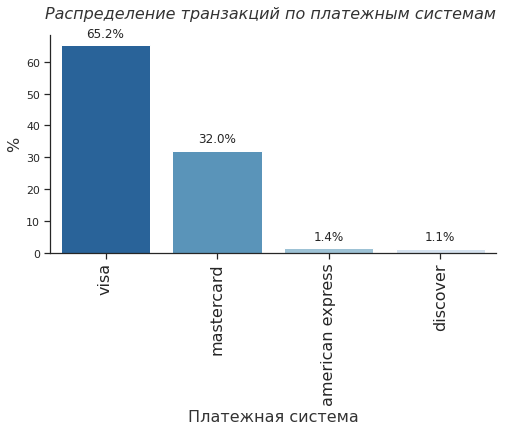

In [ ]:
# sns.set(context='notebook', style='white', font='sans-serif', palette='Blues_r', font_scale=1., color_codes=False,)
# palette=plt.get_cmap('Blues_r').reversed()
plt.figure(figsize=(8,4))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.barplot(x="index", y='proz',  data=card_4, palette='Blues_r')
for z in ax.patches: 
  ax.annotate(format(z.get_height(), '.1f') + '%', 
                   (z.get_x() + z.get_width() / 2., z.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 12), 
                   size=12, 
                   textcoords = 'offset points')
plt.xlabel('Платежная система', size = 16, color='0.2')
plt.xticks(rotation='vertical', size = 16,)
plt.ylabel('%', size = 16, color='0.2')
plt.title('Распределение транзакций по платежным системам ', size = 16, y=1.05, fontstyle='oblique', color='0.2' );

Построим график распределения транзакций по видам банковского продукта

In [ ]:
card_6=data.card6.value_counts().reset_index()
card_6['proz']=round(card_6['card6']/q, 4)*100

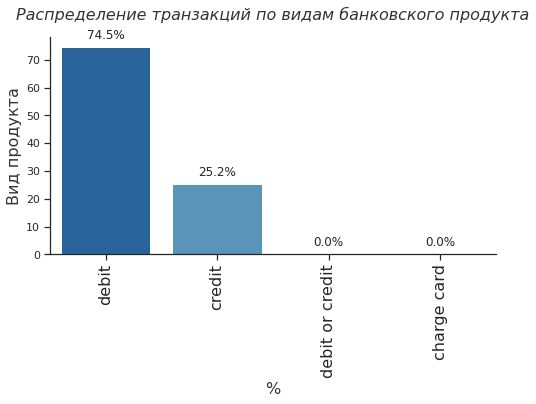

In [ ]:
plt.figure(figsize=(8,4))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.barplot(x='index', y='proz', data=card_6,  palette='Blues_r')
for z in ax.patches: 
  ax.annotate(format(z.get_height(), '.1f') + '%', 
                   (z.get_x() + z.get_width() / 2., z.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 12), 
                   size=12, 
                   textcoords = 'offset points')
plt.xlabel('%', size = 16, color='0.2')
plt.xticks(rotation='vertical', size = 16,)
plt.ylabel('Вид продукта', size = 16, color='0.2')
plt.title('Распределение транзакций по видам банковского продукта', size = 16, y=1.05, fontstyle='oblique', color='0.2' );

# Посмотрим на адреса

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/data_train_full_isFraud_03_02_reduced.csv'
data_adr = pd.read_csv(path_to_data,  usecols=addr_feature)
data.head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


In [ ]:
for col in addr_feature:
  print(col, len(data_adr[col].unique()))

addr1 333
addr2 75


In [ ]:
for col in addr_feature:
  print(col, data_adr[col].value_counts())

addr1 299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
         ...  
386.0        1
101.0        1
353.0        1
516.0        1
245.0        1
Name: addr1, Length: 332, dtype: int64
addr2 87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
         ...  
49.0         1
14.0         1
25.0         1
22.0         1
93.0         1
Name: addr2, Length: 74, dtype: int64


Построим график с адресами

In [ ]:
city=data_adr.addr1.value_counts()
ranges = [0, 1000, 2000, 5000, 20000, 50000]
labels = ['Other','Small_towns', 'Towns','City','Big_city']
citybins=(pd.cut(city, ranges,labels=labels))
# citybins.rename(columns={'addr1':'city'}, inplace=True)
# city=data_adr.addr1.value_counts()
city.name='Quantity'
city=pd.DataFrame(city).reset_index()
city['city']=pd.Series(city['index']).map(citybins)
city.head(5)

,index,Quantity,city
0,299.0,46335,Big_city
1,325.0,42751,Big_city
2,204.0,42020,Big_city
3,264.0,39870,Big_city
4,330.0,26287,Big_city


In [ ]:
city.groupby(['city'])['Quantity'].sum().reset_index()

,city,Quantity
0,Other,19669
1,Small_towns,37210
2,Towns,116154
3,City,90492
4,Big_city,261309


График по количеству операций по городам

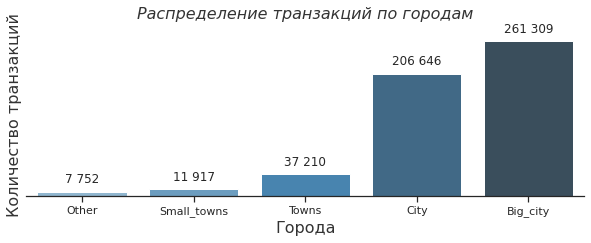

In [ ]:
plt.figure(figsize=(10,3))
annot = {'fontdict' :{'fontsize' :15},'rotation':90}
custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                 "axes.spines.left": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.barplot(x='city', y='Quantity', data=city.groupby(['city'])['Quantity']\
                 .sum().reset_index(), palette='Blues_d')
for z in ax.patches: 
  ax.annotate('{0:,.0f}'.format(z.get_height()).replace(',', ' ') , 
                   (z.get_x() + z.get_width() / 2., z.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 12), 
                   size=12, 
                   textcoords = 'offset points')
plt.xlabel('Города', size = 16, color='0.2')
ax.set_yticklabels([])
plt.yticks([]) 
plt.ylabel('Количество транзакций', size = 16, color='0.2')
plt.title('Распределение транзакций по городам', size = 16, y=1.05,
          fontstyle='oblique', color='0.2' );

График по составу корзин

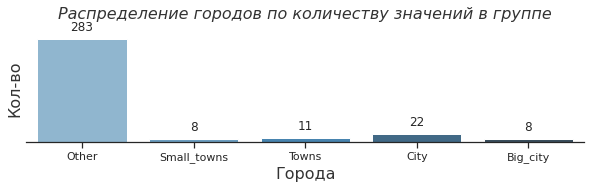

In [ ]:
plt.figure(figsize=(10,2))
annot = {'fontdict' :{'fontsize' :15},'rotation':90}
custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                 "axes.spines.left": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.countplot(x='city', data=city, palette='Blues_d')
for z in ax.patches: 
  ax.annotate('{0:,.0f}'.format(z.get_height()).replace(',', ' ') , 
                   (z.get_x() + z.get_width() / 2., z.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 12), 
                   size=12, 
                   textcoords = 'offset points')
plt.xlabel('Города', size = 16, color='0.2')
ax.set_yticklabels([])
plt.yticks([]) 
plt.ylabel('Кол-во', size = 16, color='0.2')
plt.title('Распределение городов по количеству значений в группе', size = 16, y=1.08,
          fontstyle='oblique', color='0.2' );

In [ ]:
for col in addr_feature:
  print(col, data_adr[col].isna().sum()/data_adr.shape[0])

addr1 0.1112642666034477
addr2 0.1112642666034477


Построим график по странам

In [ ]:
country=pd.Series(data=['USA'], index=[87.])
data_adr['country']=pd.Series(data_adr.addr2).map(country)
data_adr['country'].fillna('Other', inplace=True)

In [ ]:
data_adr

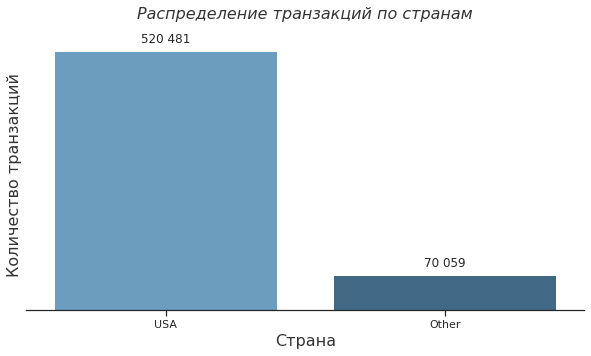

In [ ]:
plt.figure(figsize=(10,5))
annot = {'fontdict' :{'fontsize' :15},'rotation':90}
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.countplot(x='country', data=data_adr, palette='Blues_d')
for z in ax.patches: 
  ax.annotate('{0:,}'.format(z.get_height()).replace(',', ' ') , 
                   (z.get_x() + z.get_width() / 2., z.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 12), 
                   size=12, 
                   textcoords = 'offset points')
plt.xlabel('Страна', size = 16, color='0.2')
ax.set_yticklabels([])
plt.yticks([]) 
plt.ylabel('Количество транзакций', size = 16, color='0.2')
plt.title('Распределение транзакций по странам', size = 16, y=1.05, fontstyle='oblique', color='0.2' );

#Проанализируем сумму операции

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/data_train_full_isFraud_03_02_reduced.csv'
data = pd.read_csv(path_to_data,  usecols=['isFraud', 'TransactionAmt'])
data.head()

,isFraud,TransactionAmt
0,0,68.5
1,0,29.0
2,0,59.0
3,0,50.0
4,0,50.0


In [ ]:
data.shape

(590540, 2)

In [ ]:
ranges = [0, 100, 500, 1000, 5000, 10000, 50000]
labels = ['100usd&less','100-500usd', '500-1000usd','1000-5000usd','5000-1000usd', '10000usd&more']
data['Sum_bins']=(pd.cut(pd.Series(data.TransactionAmt), ranges, labels=labels))

In [ ]:
data.head(5)

,TransactionAmt,isFraud,Sum_bins
0,68.5,0,100usd&less
1,29.0,0,100usd&less
2,59.0,0,100usd&less
3,50.0,0,100usd&less
4,50.0,0,100usd&less


In [ ]:
data_gr=data[data['TransactionAmt']<=500.].copy()

In [ ]:
ranges = [0, 100, 500]
labels = ['100usd&less','100-500usd']
data_gr['Sum_bins']=(pd.cut(pd.Series(data.TransactionAmt), ranges, labels=labels))

In [ ]:
data_gr=data_gr.groupby(['Sum_bins', 'isFraud'])['TransactionAmt'].mean()

In [ ]:
data_gr=data_gr.unstack()

In [ ]:
data_gr=data_gr.reset_index()

In [ ]:
data_gr

,Sum_bins,isFraud,TransactionAmt
0,100usd&less,0,50.775366
1,100usd&less,1,46.247395
2,100-500usd,0,189.447583
3,100-500usd,1,222.054808


In [ ]:
data_gr=data_gr.groupby(['Sum_bins', 'isFraud'])['TransactionAmt'].mean()

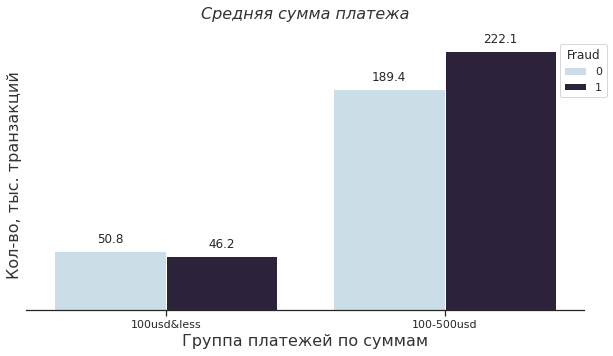

In [ ]:
plt.figure(figsize=(10,5))
annot = {'fontdict' :{'fontsize' :15},'rotation':90}
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.barplot(x='Sum_bins',
                 y='TransactionAmt', 
                  hue='isFraud',
                 data=data_gr, palette='ch:s=.25,rot=-.25')
for z in ax.patches: 
  ax.annotate('{0:,}'.format(round(z.get_height(),1)).replace(',', ' ') , 
                   (z.get_x() + z.get_width() / 2., z.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 12), 
                   size=12, 
                   textcoords = 'offset points')
plt.xlabel('Группа платежей по суммам', size = 16, color='0.2')
ax.set_yticklabels([])
plt.yticks([]) 
plt.ylabel('Кол-во, тыс. транзакций', size = 16, color='0.2')
plt.legend(loc='upper right', bbox_to_anchor=(1.05,1), title='Fraud')
plt.title('Средняя сумма платежа', size = 16, y=1.05, fontstyle='oblique', color='0.2' );

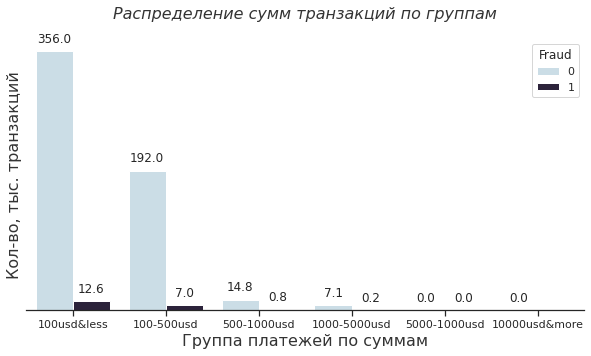

In [ ]:
plt.figure(figsize=(10,5))
annot = {'fontdict' :{'fontsize' :15},'rotation':90}
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.countplot(x='Sum_bins', 
                  hue='isFraud',
                 data=data, palette='ch:s=.25,rot=-.25')
for z in ax.patches: 
  ax.annotate('{0:,}'.format(round(z.get_height()/1000,1)).replace(',', ' ') , 
                   (z.get_x() + z.get_width() / 2., z.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 12), 
                   size=12, 
                   textcoords = 'offset points')
plt.xlabel('Группа платежей по суммам', size = 16, color='0.2')
ax.set_yticklabels([])
plt.yticks([]) 
plt.ylabel('Кол-во, тыс. транзакций', size = 16, color='0.2')
plt.legend(loc='upper right', bbox_to_anchor=(1,1), title='Fraud')
plt.title('Распределение сумм транзакций по группам', size = 16, y=1.05, fontstyle='oblique', color='0.2' );

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

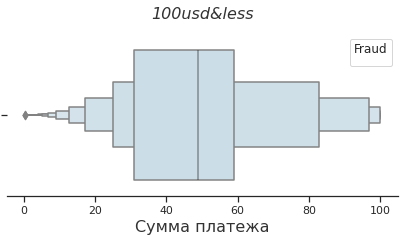

No handles with labels found to put in legend.


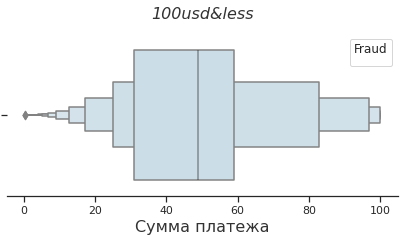

No handles with labels found to put in legend.


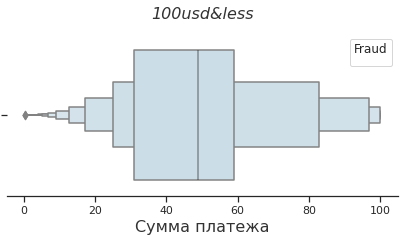

No handles with labels found to put in legend.


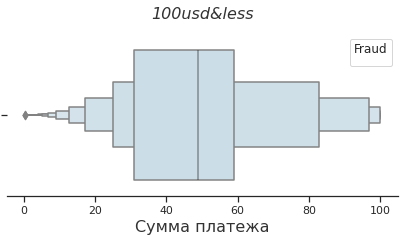

No handles with labels found to put in legend.


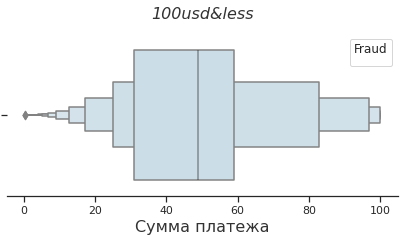

No handles with labels found to put in legend.


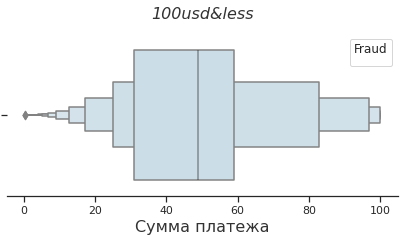

In [ ]:
annot = {'fontdict' :{'fontsize' :15},'rotation':90}
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False}
sns.set_theme(style="ticks", rc=custom_params)
# fig=
plt.figure()
axes=fig.subplots(7, 1, sharex=True, sharey=True)
i=1
for val in data['Sum_bins'].unique():
  plt.figure(figsize=(7,3))
  # plt.subplot(3,2,i)
  axes[i] = sns.boxenplot(# x='Sum_bins',
                 x='TransactionAmt',
                  y='isFraud',
                 data=data[data['Sum_bins']==val],
                 palette='ch:s=.25,rot=-.25')
  for z in ax.patches: 
    ax.annotate('{0:,}'.format(z.get_height()).replace(',', ' ') , 
                   (z.get_x() + z.get_width() / 2., z.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 12), 
                   size=12, 
                   textcoords = 'offset points')
  plt.xlabel('Сумма платежа', size = 16, color='0.2')
  # plt.ylabel('Сумма транзакций', size = 16, color='0.2')
  plt.legend(loc='upper right', bbox_to_anchor=(1,1), title='Fraud')
  plt.title(val, size = 16, y=1.05, fontstyle='oblique', color='0.2' )
  plt.show()
  plt.close();
  i+=1
  if i>6:
    break


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


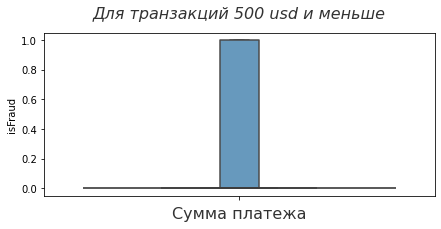

In [ ]:
plt.figure(figsize=(7,3))
# val='100-500usd'
data_graf=data.query('TransactionAmt<500')[['TransactionAmt', 'isFraud']]
ax = sns.boxenplot(y='isFraud',
                 data=data_graf,
                 orient='h',
                 palette='Blues_d')
plt.xlabel('Сумма платежа', size = 16, color='0.2')
plt.title("Для транзакций 500 usd и меньше", size = 16, y=1.05, fontstyle='oblique', color='0.2' );

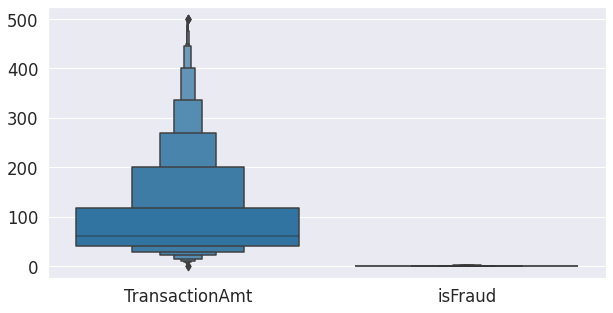

In [ ]:
with sns.plotting_context('notebook', font_scale=1.5), \
    sns.axes_style('darkgrid'):
      plt.figure(figsize=(10, 5))
      data=data.query('TransactionAmt<500')[['TransactionAmt', 'isFraud']]
      ax=sns.boxenplot(data=data)

In [ ]:
del data

#Анализ пропусков

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/data_train_full_isFraud_03_02_reduced.csv'
data = pd.read_csv(path_to_data,  usecols=features_cat_itog)
data.head()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,NaN,T,T,T,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
d.update({'d':5})

In [ ]:
d={}
for col in features_cat_itog:
  d.update({col:round(data[col].isna().sum()/data.shape[0]*100,2)})

In [ ]:
len(d)

45

In [ ]:
d

In [ ]:
df=pd.Series(d)

In [ ]:
df=pd.DataFrame(df).reset_index()
df.rename(columns={'index':'feature_name', 0:'percent_Nan'}, inplace=True)

In [ ]:
df=df.sort_values(by='percent_Nan')

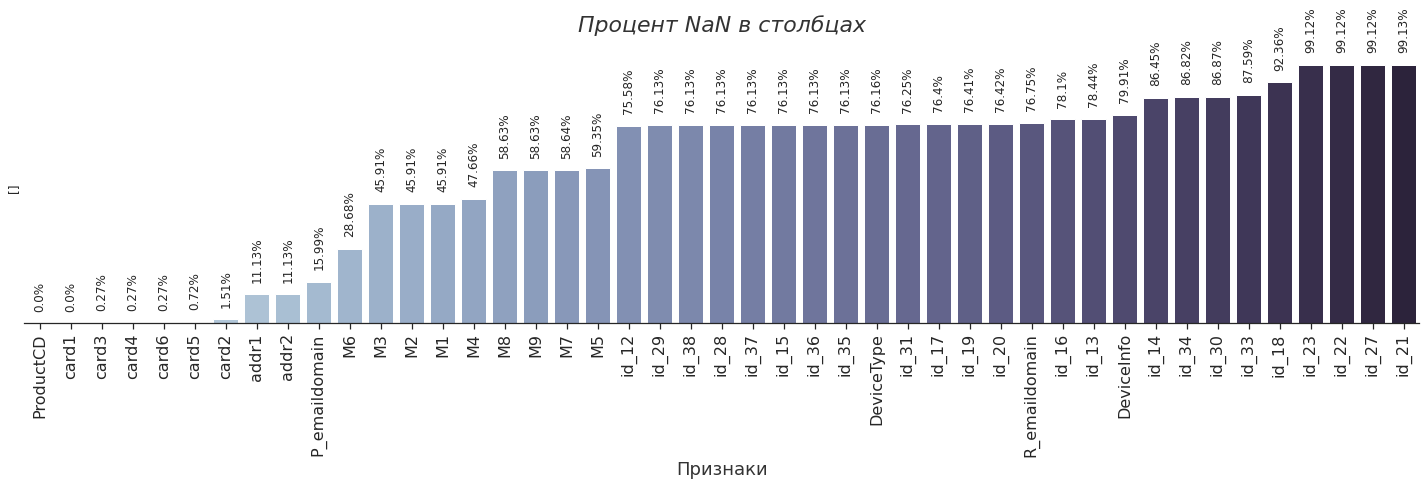

In [ ]:
plt.figure(figsize=(25,5))
annot = {'fontdict' :{'fontsize' :15},'rotation':90}
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.barplot(x='feature_name', y='percent_Nan',         
                 data=df, palette='ch:s=.25,rot=-.25')
for z in ax.patches: 
  ax.annotate('{0:,}'.format(z.get_height())+'%' , 
                   (z.get_x() + z.get_width() / 2., z.get_height()), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, 12), 
                   size=12, 
                   textcoords = 'offset points', rotation='90')
plt.xlabel('Признаки', size = 18, color='0.2')
ax.set_yticklabels([])
plt.xticks(rotation='90',size = 16 )
plt.yticks([]) 
plt.ylabel([])
# plt.legend(loc='upper right', bbox_to_anchor=(1.05,1), title='Fraud')
plt.title('Процент NaN в столбцах', size = 22, y=1.05, fontstyle='oblique', color='0.2' );

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/feature_import_10_01_v10_1.csv'
feature_imp = pd.read_csv(path_to_data)
feature_imp.head(10)

,feature,importance
0,TransactionAmt,6.395190
1,card2,4.429416
2,C1,4.286466
3,P_emaildomain,3.803752
4,card_card,3.659069
5,card1,3.544826
6,addr1,3.486585
7,M5,3.258221
8,C13,3.133698
9,M6,2.999992


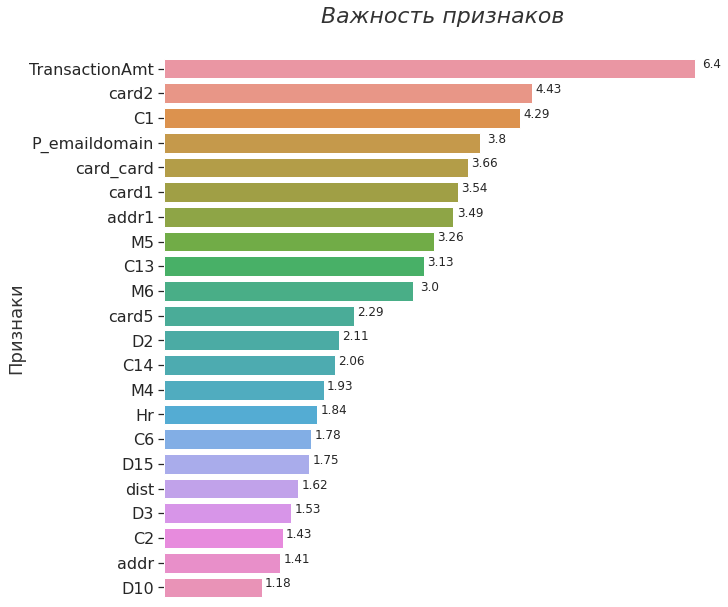

In [ ]:
plt.figure(figsize=(10,10))
annot = {'fontdict' :{'fontsize' :15},'rotation':90}
custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                 "axes.spines.left": False, "axes.spines.bottom": False}
sns.set_theme(style="ticks", rc=custom_params)
ax = sns.barplot(x='importance', y='feature', data=feature_imp.head(22))
for z in ax.patches: 
  ax.annotate('{0:,}'.format(round(z.get_width(),2)) , 
                   (z.get_width()+0.2, z.get_y()+z.get_height()/1.7 ), 
                   ha = 'center', va = 'top', 
                   xytext = (0, 12), 
                   size=12, 
                   textcoords = 'offset points')
plt.ylabel('Признаки', size = 18, color='0.2')
# ax.set_yticklabels([])
plt.yticks(size = 16 )
plt.xticks([]) 
ax.set_xticklabels([])
ax.set_xlabel('')
# plt.xlabel('Важность', size = 18, color='0.2')
# plt.legend(loc='upper right', bbox_to_anchor=(1.05,1), title='Fraud')
plt.title('Важность признаков', size = 22, y=1.05, fontstyle='oblique', color='0.2' );